######################################################################################################

Talking Data - Predicting Mobile Phone Downloads


Date: 3/17/2018

Last updated date: 3/23/2018

Version:2.0

Link to original project: https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data

######################################################################################################

### STEP 1: Load the data and prepare a sample

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train=pd.read_csv('C:/Users/raghavanv/Desktop/train.csv')

################################################################################

The train dataset was downloaded and all the 1's were retrieved. 
We also pulled out an equal number of 0's to ensure that we had a 50:50 split 
of 0s to 1s in the data 

################################################################################

In [6]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [12]:
len(train[train.is_attributed==1])

456846

In [13]:
train_attributed=train[train.is_attributed==1]
train_not_attributed=train[train.is_attributed==0]

Sampling out equal number of not attributed records 

In [17]:
sampled_not_attributed=train_not_attributed.sample(n=456846)

In [109]:
final_train_data=train_attributed.append(sampled_not_attributed)

Save the file with 50:50 split. This file - "sampled_train" will be used in the EDA, FE and model building 

In [4]:
final_train_data.to_csv('C:/Users/raghavanv/Desktop/sampled_train.csv')

In [101]:
final_train_data=pd.read_csv('C:/Users/raghavanv/Downloads/sampled_train.csv')

### STEP 2: Exploratory data analysis

#### High attribution Channels 

In [77]:
final_train_data.channel.describe()

count    913692.000000
mean        237.155614
std         126.007741
min           0.000000
25%         130.000000
50%         213.000000
75%         328.000000
max         498.000000
Name: channel, dtype: float64

In [42]:
#Were there any channels that were responsible for high attribution?
attribution_channels=final_train_data.groupby(['channel'],as_index=False)['is_attributed'].mean()

attribution_channels[attribution_channels.is_attributed>0.9]

,channel,is_attributed
0,0,0.969466
2,4,0.961039
3,5,0.998618
5,14,1.000000
10,21,0.985634
17,108,0.902778
20,113,0.980914
21,114,1.000000
45,162,1.000000
46,169,1.000000


Yes, it does look like there were 40 channels that had very high attribution like channels -10, 17, 21, 149, 155, 159,178 etc

#### High attribution apps 

In [78]:
final_train_data.app.describe()

count    913692.000000
mean         20.878494
std          27.220278
min           0.000000
25%           9.000000
50%          15.000000
75%          23.000000
max         768.000000
Name: app, dtype: float64

In [39]:
#Were there any apps that were responsible for high attribution?
attribution_apps=final_train_data.groupby(['app'],as_index=False)['is_attributed'].mean()

attribution_apps[attribution_apps.is_attributed>0.9]

,app,is_attributed
0,0,0.990148
5,5,0.968559
10,10,0.955299
16,16,0.994493
19,19,0.985499
29,29,0.964050
34,34,0.997396
35,35,0.999098
37,37,0.912579
39,39,0.992371


Yes, there were 164 apps that had a very high attribution like -0,5,10,16,19 76 etc

#### High attribution devices

In [79]:
final_train_data.device.describe()

count    913692.000000
mean         26.704249
std         239.155908
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        4223.000000
Name: device, dtype: float64

In [72]:
#Were there any devices that were responsible for high attribution?
attribution_devices=final_train_data.groupby(['device'],as_index=False)['is_attributed'].agg(['mean', 'count'])
attribution_devices

,mean,count
device,,
0,0.977440,104167
1,0.415677,737339
2,0.099047,22444
4,0.993789,322
5,0.000000,41
6,0.990223,2966
7,0.993453,611
8,0.994709,189
9,0.992453,265


Yes, we had to use a very high threshold to identify the top attribution devices that
had very high attribution(100%).
We got 1650 distinct devices that had 100% attribution however, since most of them 
were devices that occured only once. So we will be looking for high attribution 
and some consistency in acheiving high attribution(across more than 1 click)

#### High attribution OS 


In [80]:
final_train_data.os.describe()

count    913692.000000
mean         23.581530
std          55.066414
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max         866.000000
Name: os, dtype: float64

We expect this to be closely aligned with the devices


This is also expected to be a better indicator of devices since for eg. all iphones would run ios regardless of whether its an iphone 6 or an iphone 7. So this is more likely to be a better indicator(higher level approximation) of the relationship between the device and the attribution than the field device itself

In [74]:
#Were there any OSs that were responsible for high attribution?
attribution_os=final_train_data.groupby(['os'],as_index=False)['is_attributed'].agg(['mean', 'count'])
attribution_os

,mean,count
os,,
0,0.978848,38861
1,0.294216,7797
2,0.093886,1832
3,0.252755,9709
4,0.797290,7158
5,0.248394,467
6,0.325116,16874
7,0.914745,6029
8,0.303731,18467


We are looking for the high attribution OSs(mean attribution is greater than 0.9) that are also prevalent( count>1) since that is expected to be a more holistic parameter to quantify attribution causation

#### High attribution clicktime hour 

Using the above EDA,we have classified the ip, app, device, os , channel 
and clicktime_hour into the aggregate values of attribution taken for that given category 

In [98]:
final_train_data.head()

,Unnamed: 0,ip,app,device,os,channel,click_time,attributed_time,is_attributed_x,clicktime_hour,attributedtime_hour,is_attributed_y
0,103,204158,35,1,13,21,11/6/2017 15:41,11/7/2017 8:17,1,15,8.0,0.985634
1,1504,29692,9,1,22,215,11/6/2017 16:00,11/7/2017 10:05,1,16,NaN,0.295527
2,1798,64516,35,1,13,21,11/6/2017 16:00,11/6/2017 23:40,1,16,NaN,0.985634
3,2102,172429,35,1,46,274,11/6/2017 16:00,11/7/2017 0:55,1,16,NaN,0.998380
4,3056,199085,35,1,13,274,11/6/2017 16:00,11/6/2017 23:04,1,16,NaN,0.998380


In [109]:
channels=final_train_data.groupby(['channel'],as_index=False)['is_attributed'].mean()
final_train_data=final_train_data.merge(channels,how='left',on='channel')
final_train_data=final_train_data.rename(columns={'is_attributed_y': 'channel_attribution'})

app=final_train_data.groupby(['app'],as_index=False)['is_attributed_x'].mean()
final_train_data=final_train_data.merge(app,how='left',on='app')
final_train_data=final_train_data.rename(columns={'is_attributed_x_y': 'app_attribution'})


device=final_train_data.groupby(['device'],as_index=False)['is_attributed_x_x'].mean()
final_train_data=final_train_data.merge(device,how='left',on='device')
final_train_data=final_train_data.rename(columns={'is_attributed_x_x_y': 'device_attribution'})

os=final_train_data.groupby(['os'],as_index=False)['is_attributed_x_x_x'].mean()
final_train_data=final_train_data.merge(os,how='left',on='os')
final_train_data=final_train_data.rename(columns={'is_attributed_x_x_x_y': 'os_attribution'})


clicktime=final_train_data.groupby(['clicktime_hour'],as_index=False)['is_attributed_x_x_x_x'].mean()
final_train_data=final_train_data.merge(clicktime,how='left',on='clicktime_hour')
final_train_data=final_train_data.rename(columns={'is_attributed_x_x_x_x_y': 'clicktime_hour_attribution'})




final_train_dataset=final_train_data[['channel_attribution', 'app_attribution','device_attribution', 'os_attribution', 'clicktime_hour_attribution','is_attributed_x_x_x_x_x']]



In [110]:
final_train_dataset.head()

,channel_attribution,app_attribution,device_attribution,os_attribution,clicktime_hour_attribution,is_attributed_x_x_x_x_x
0,0.985634,0.999098,0.415677,0.384950,0.368649,1
1,0.295527,0.314682,0.415677,0.415071,0.411133,1
2,0.985634,0.999098,0.415677,0.384950,0.411133,1
3,0.998380,0.999098,0.415677,0.201595,0.411133,1
4,0.998380,0.999098,0.415677,0.384950,0.411133,1


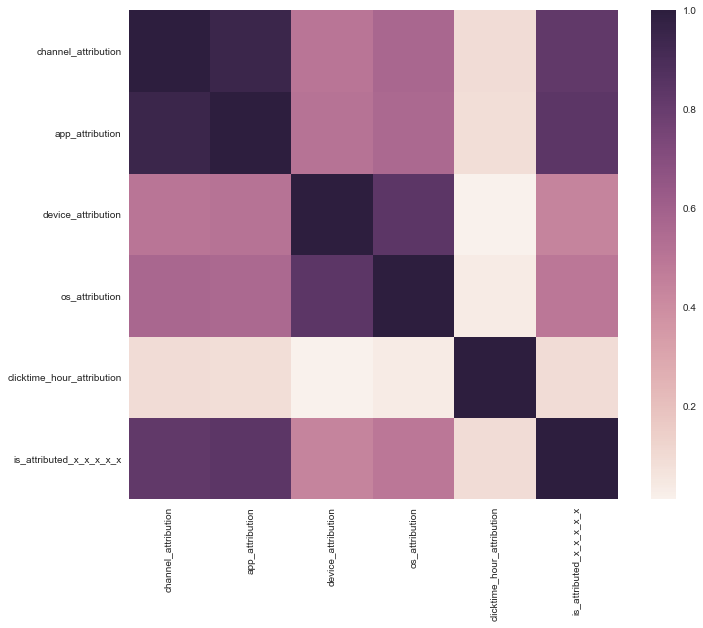

In [112]:
corrmat = final_train_dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

Device and OS seem to be highly corrated.Similarly, app and channel also seem to be very highly correlted.  
So we will use the variance inflation factor to be able to identify which one of the two should be chosen as a feature in the model


In [117]:
#Calculate Variance inflation factors(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
print("The VIF values for the features are:")
X = add_constant(final_train_dataset)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

The VIF values for the features are:


const                         124.265438
channel_attribution            10.601271
app_attribution                11.345728
device_attribution              3.426977
os_attribution                  3.742767
clicktime_hour_attribution      1.012125
is_attributed_x_x_x_x_x         3.504438
dtype: float64

We will be removing the features - app_attribution and device_attribution (reason discussed above)

In [119]:
#Preparing the final dataset that is going to be used in model building :
train_dataset=final_train_dataset[['channel_attribution','os_attribution','clicktime_hour_attribution','is_attributed_x_x_x_x_x']]

In [121]:
train_dataset.head()

,channel_attribution,os_attribution,clicktime_hour_attribution,is_attributed_x_x_x_x_x
0,0.985634,0.384950,0.368649,1
1,0.295527,0.415071,0.411133,1
2,0.985634,0.384950,0.411133,1
3,0.998380,0.201595,0.411133,1
4,0.998380,0.384950,0.411133,1


### STEP 3: MODEL BUILDING 

We tried three different approaches to modelling :
    1. We tried knn - an unsupervised technique that uses the neighbours to predict the individual value was used. 
       We also tried the knn algorithm with a scaling predictor to tune the model for better performance
    2. We also tried the gradient boosting classifier
    3. We also a simple decision tree
    4. We also extrapolated the simple decision tree to arrive at an ensemble methos - Random forest

In [124]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_dataset, test_size=0.2)

In [125]:
train.head()

,channel_attribution,os_attribution,clicktime_hour_attribution,is_attributed_x_x_x_x_x
901851,0.045428,0.421636,0.460548,0
306678,0.987833,0.978848,0.411133,1
400852,0.980914,0.648526,0.546345,1
2454,0.987833,0.989163,0.411133,1
639828,0.169073,0.286835,0.524268,0


In [126]:
X_train=train[['channel_attribution','os_attribution','clicktime_hour_attribution']]
y_train=train[['is_attributed_x_x_x_x_x']]
X_test=test[['channel_attribution','os_attribution','clicktime_hour_attribution']]
y_test=test[['is_attributed_x_x_x_x_x']]

##### Technique 1: KNN 

In [129]:
# k-Nearest Neighbor without scaling predictor
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.87      0.93      0.90     91097
          1       0.92      0.86      0.89     91642

avg / total       0.90      0.89      0.89    182739

[[84398  6699]
 [12688 78954]]


In [130]:
# k-Nearest Neighbor with scaling predictor
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.87      0.93      0.90     91097
          1       0.92      0.86      0.89     91642

avg / total       0.90      0.89      0.89    182739

[[84398  6699]
 [12688 78954]]


#### Technique 2: GBDT

In [128]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train, y_train)
y_pred = gbm0.predict(X_test)

print (gbm0)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=1.0, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.86      0.95      0.91     91097
          1       0.95      0.85      0.90     91642

avg / total       0.91      0.90      0.90    182739

[[86887  4210]
 [13809 77833]]


#### Technique 3: Simple decision tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (clf)
print (metrics.classification_report(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
             precision    recall  f1-score   support

          0       0.87      0.94      0.90     91097
          1       0.94      0.86      0.90     91642

avg / total       0.90      0.90      0.90    182739

[[85812  5285]
 [12781 78861]]


#### Technique 4: Random forest - ensemble

In [13]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
 
model = RandomForestClassifier(n_estimators=100)

In [19]:
model.fit(X_train, y_train)

C:\Users\raghavanv\AppData\Local\Continuum\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
predicted= model.predict(X_test)

In [20]:
print("Accuracy is - "+str(accuracy_score(y_test,predicted)))
print("Precision is - "+str(precision_score(y_test,predicted)))
print("Recall is - "+str(recall_score(y_test,predicted)))

print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))

Accuracy is - 0.895742014567
Precision is - 0.903370162678
Recall is - 0.887135644417
[[82334  8702]
 [10350 81353]]
             precision    recall  f1-score   support

          0       0.89      0.90      0.90     91036
          1       0.90      0.89      0.90     91703

avg / total       0.90      0.90      0.90    182739



#### K-Fold Cross Validation 

In [37]:
from sklearn.cross_validation import KFold, cross_val_score
k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)
clf = RandomForestClassifier(n_estimators=100)
print(cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1))

C:\Users\raghavanv\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raghavanv\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raghavanv\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raghavanv\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\c

[ 0.90881854  0.90734103  0.90719054  0.90848895  0.90785963  0.90825638
  0.90662836  0.9080238   0.90981599  0.90639579]


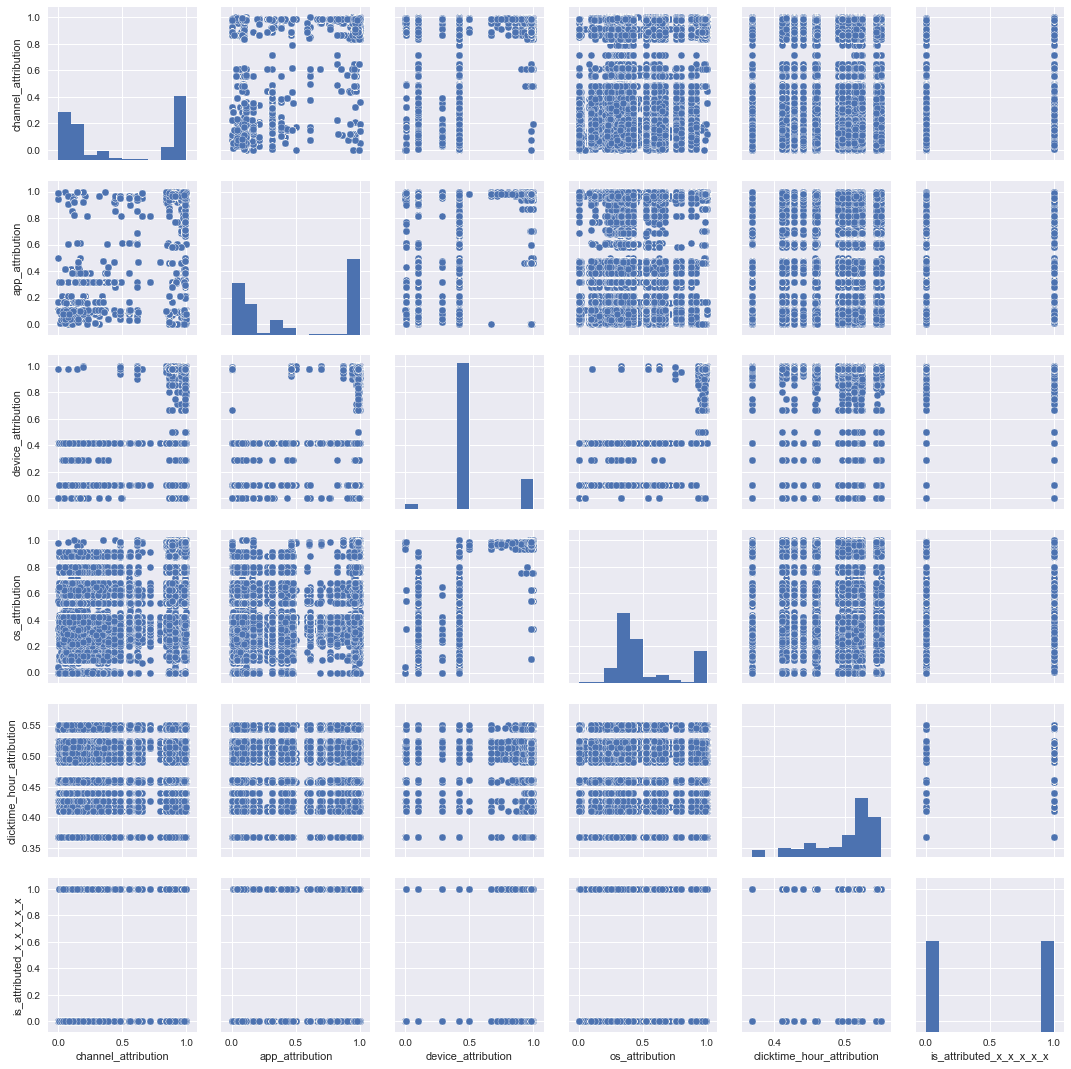

In [135]:
sns.pairplot(final_train_dataset)